In [96]:
import random
import os
import sys
import argparse
import json

from individual import Individual
from knapsack import Knapsack
from geneticAlgorithm import GeneticAlgorithm
from matplotlib import pyplot as plt

0-1Knapsack Dataset is loaded!
Total weight capacity: 13743
Dataset is loading...
500 data are loaded!
Roulette 100 genes are generated!
Tournament 100 genes are generated!
Roulette Wheel Selection best profit: 17595
Roulette Wheel Selection mean of profit: 14684.15
Pairwise Tournament Selection best profit: 17459
Pairwise Tournament Selection mean of profit: 13946.59


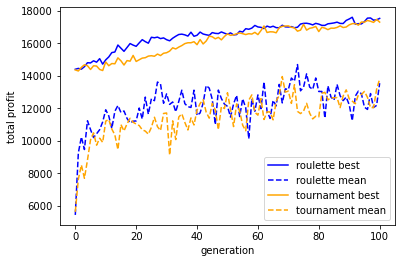

In [97]:
if __name__ == '__main__':
    # Set work directory
    path = os.path.abspath('/home/irr_jinwook/EAI/ga_hw1.ipynb') # Fill the /path/to/this file
    path = os.path.dirname(path)
    os.chdir(path)

    # Set arguments to variables
    filename = 'TestData(0-1Knapsack).txt'
    crossover_prob = 0.9
    mutation_prob = 0.01
    popSize = 100
    generation = 100

    # Dataset read and parsing
    knapsack = Knapsack(filename)
    knapsack.reader()
    gene_size = len(knapsack.dataset)

    # Generate each GA instance
    roulette = GeneticAlgorithm(gene_size, popSize, crossover_prob, mutation_prob)
    tournament = GeneticAlgorithm(gene_size, popSize, crossover_prob, mutation_prob)

    # Roulette Wheel selection GA Initialization
    print('Roulette', end=' ')
    roulette.initialization()
    roulette.calculateFitness(knapsack)
    # Tournament selection GA Initialization
    print('Tournament', end=' ')
    tournament.initialization()
    tournament.calculateFitness(knapsack)

    # Training
    for i in range(generation):
        roulette.rouletteWheelSelection()
        roulette.threePointCrossover()
        roulette.bitwiseMutation()
        roulette.calculateFitness(knapsack)
        

        tournament.pairwiseTournamentSelection()
        tournament.threePointCrossover()
        tournament.bitwiseMutation()
        tournament.calculateFitness(knapsack)

    # Print total best results.
    print('Roulette Wheel Selection best profit:', max(roulette.best))
    print('Roulette Wheel Selection mean of profit:', max(roulette.mean))
    print('Pairwise Tournament Selection best profit:', max(tournament.best))
    print('Pairwise Tournament Selection mean of profit:', max(tournament.mean))

    result_file = 'result.json'
    if os.path.isfile(result_file):
        with open(result_file, 'r') as f:
            jsonDict = json.load(f)
        for i in range(generation+1):
            jsonDict[i]['roulette'].append(roulette.best[i])
            jsonDict[i]['tournament'].append(tournament.best[i])
        jsonString = json.dumps(jsonDict, indent=4)
        with open(result_file, 'w') as f:
            f.write(jsonString)
        
    else:
        tmp_list = []
        for i in range(generation+1):
            tmp_dict = {
                'generation' : i,
                'roulette' : [roulette.best[i]],
                'tournament' : [tournament.best[i]]
            }
            tmp_list.append(tmp_dict)
        jsonString = json.dumps(tmp_list, indent=4)
        with open(result_file, 'w') as f:
            f.write(jsonString)

    # Draw plot of results.
    plt.plot(range(generation+1), roulette.best, color='blue')
    plt.plot(range(generation+1), roulette.mean, color='blue', linestyle='--')
    plt.plot(range(generation+1), tournament.best, color='orange')
    plt.plot(range(generation+1), tournament.mean, color='orange', linestyle='--')
    plt.xlabel('generation')
    plt.ylabel('total profit')
    plt.legend(['roulette best', 'roulette mean', 'tournament best', 'tournament mean'])
    plt.show()